# Chapter 2: Working with the MNIST dataset

In [2]:
#Load the MNIST dataset with Keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

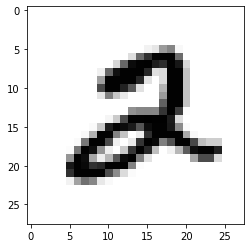

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.show()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### A basic Neural Network scheme

In [8]:
from tensorflow.keras import layers, Sequential

model = Sequential([
             layers.Dense(512, activation = 'relu'),
             layers.Dense(10, activation = 'softmax')
])

2022-03-27 21:39:35.486038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-27 21:39:35.486070: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-27 21:39:35.486087: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (stephy-VivoBook): /proc/driver/nvidia/version does not exist
2022-03-27 21:39:35.486367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define the "learning" of the model

In [9]:
model.compile(optimizer='rmsprop',
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

### Preprocess the data by reshaping it and scaling it so that all the values are in the [0,1]
This is a way to normalize and scale the data, sklearn.preprocessing could be used with 
MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [10]:
#avoid overwriting the input tensor
train_images = train_images.copy()
train_images = train_images.reshape((60000, 28* 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [11]:
#avoid overwriting the input tensor
test_images = test_images.copy()
test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype("float32") / 255
test_images.shape

(10000, 784)

### Fit the model to the data
The values displayed during training: the loss of the model over the training data and the accuracy

In [12]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

2022-03-27 21:39:36.291018: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2022-03-27 21:39:36.424873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-27 21:39:36.425374: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099940000 Hz


Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2555 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1044 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9888


### Predict the values

In [13]:
#Chack the very first 10 data values
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions

array([[1.04976916e-09, 5.14532916e-10, 1.82810550e-06, 5.26725671e-06,
        2.17788157e-12, 7.38392458e-09, 2.55098096e-15, 9.99992728e-01,
        4.30470593e-09, 2.61416261e-07],
       [2.23947833e-10, 1.45275942e-06, 9.99996543e-01, 1.96537894e-06,
        7.71595949e-20, 7.17137993e-09, 1.22491586e-10, 2.64581805e-16,
        6.81583234e-09, 1.75579091e-16],
       [3.88773742e-08, 9.99856353e-01, 9.97912412e-06, 9.52266817e-07,
        3.23677195e-05, 2.79789128e-06, 8.36730635e-07, 7.96009263e-05,
        1.55174694e-05, 1.49573918e-06],
       [9.99686241e-01, 2.67126898e-09, 2.26955279e-04, 3.99384874e-07,
        4.15729424e-08, 1.41122666e-06, 2.57199758e-06, 5.63330432e-05,
        6.57832189e-09, 2.61495970e-05],
       [1.19412525e-05, 6.16695695e-10, 1.25169026e-05, 2.99993843e-07,
        9.02450442e-01, 8.21178730e-07, 7.21510423e-06, 7.20012322e-05,
        3.17342601e-05, 9.74130258e-02],
       [3.63204578e-10, 9.99878407e-01, 4.80167195e-08, 1.78612733e-08,
   

In [14]:
predictions[0]

array([1.0497692e-09, 5.1453292e-10, 1.8281055e-06, 5.2672567e-06,
       2.1778816e-12, 7.3839246e-09, 2.5509810e-15, 9.9999273e-01,
       4.3047059e-09, 2.6141626e-07], dtype=float32)

In [15]:
predictions[0].argmax()

7

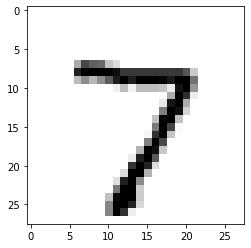

In [16]:
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [17]:
predictions[0][7]

0.9999927

In [18]:
test_labels[0]

7

### Evaluate the model on new data
The gap between the trainig accuracy and test accuracy is an example of overfitting.

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.0700 - accuracy: 0.9788


0.9787999987602234

In [20]:
import numpy as np
np.mean(history.history['accuracy'])

0.969813346862793

### Check the time that takes to do train

In [21]:
import time 

time0 = time.time()
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
time.time() - time0 #in seconds

Epoch 1/5
 17/469 [>.............................] - ETA: 3s - loss: 0.0333 - accuracy: 0.9908

2022-03-27 21:39:51.695701: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.0291 - accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0172 - accuracy: 0.9947
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0107 - accuracy: 0.9968


14.736417531967163

### Optimizers can be defined using the optimizers package

In [25]:
from tensorflow.keras import optimizers

optimizer_SGD = optimizers.SGD(learning_rate=1e-3)

In [27]:
model.compile(optimizer=optimizer_SGD,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [32]:
time0_SGD = time.time()
history_SGD = model.fit(train_images, train_labels, epochs=5, batch_size=128)
time.time() - time0_SGD

Epoch 1/5
 44/469 [=>............................] - ETA: 1s - loss: 0.0056 - accuracy: 0.9982

2022-03-27 21:45:07.523017: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9989
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9990


9.141441345214844

In [30]:
predictions = model.predict(test_digits)
predictions[0].argmax()

7

In [31]:
predictions[0][7]

0.9999999

In [33]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.0663 - accuracy: 0.9820


0.9819999933242798